In [20]:
%config InlineBackend.figure_format = "svg"
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

### Nota: Coletar aproximadamente o mesmo número de dados relativamente às duas classes: background and not background

# Coletar os dados de FCNC

In [21]:
fcnc_df = pd.read_hdf("Data/FCNC/inter.h5")
fcnc_df1 = pd.read_hdf("Data/FCNC/tZFCNC.h5")

In [22]:
fcnc_df.head()

,Jet_Multi,Jet1_Mass,Jet1_Eta,Jet1_Phi,Jet1_PT,Jet1_BTag,Jet2_Mass,Jet2_Eta,Jet2_Phi,Jet2_PT,...,Muon2_Eta,Muon2_Phi,Muon2_PT,MissingET_MET,MissingET_Phi,MissingET_Eta,ScalarHT_HT,gen_xsec,gen_decay1,gen_decay2
0,2,29.559593,-0.041449,-0.896551,605.866272,0.0,10.277758,0.324245,0.488902,105.363976,...,0.000000,0.000000,0.000000,116.300995,1.207425,2.507766,1309.735962,0.000842,0,0
1,3,22.896978,0.431433,-3.001914,114.887047,0.0,20.073458,0.552434,-0.826290,81.735840,...,0.000000,0.000000,0.000000,28.379551,-0.826482,1.385504,438.505585,0.000842,0,0
2,2,10.882245,2.271323,-1.158327,168.800598,0.0,13.758996,1.318611,0.735665,52.711620,...,0.000000,0.000000,0.000000,114.869186,-0.650107,-3.531537,483.884979,0.000842,0,0
3,3,19.743166,-1.240725,-0.234984,84.256790,0.0,10.337635,0.654461,2.836026,48.761101,...,0.000000,0.000000,0.000000,39.297211,2.501537,3.180309,157.432877,0.000842,0,0
4,3,28.400167,1.036263,3.026119,201.453888,0.0,16.668438,-0.087710,0.174472,154.811935,...,-0.831882,0.155378,94.174767,144.301743,1.790982,-0.173303,669.868164,0.000842,0,0


In [23]:
fcnc_df1.head()

,Jet_Multi,Jet1_Mass,Jet1_Eta,Jet1_Phi,Jet1_PT,Jet1_BTag,Jet2_Mass,Jet2_Eta,Jet2_Phi,Jet2_PT,...,Muon2_Eta,Muon2_Phi,Muon2_PT,MissingET_MET,MissingET_Phi,MissingET_Eta,ScalarHT_HT,gen_xsec,gen_decay1,gen_decay2
0,4,10.067129,-1.539083,1.074470,349.646851,0.0,12.359470,1.100663,-2.012144,228.409668,...,0.000000,0.000000,0.000000,181.313797,-2.378200,-0.034900,668.541626,0.000639,0,0
1,2,35.313316,1.938742,-2.048392,217.986435,1.0,10.705207,0.709716,0.096232,55.020763,...,0.000000,0.000000,0.000000,129.511734,-2.661607,-2.325649,604.904663,0.000639,0,0
2,3,18.866467,3.030105,-2.312740,95.757080,0.0,11.006821,-0.254365,1.459355,75.780487,...,1.354136,-2.123722,32.940285,94.819901,-2.923024,-3.187634,450.261353,0.000639,0,0
3,4,19.342302,1.029309,-3.016766,85.108658,0.0,5.142741,0.774672,1.246770,50.024113,...,0.005399,-0.503739,40.698486,91.869278,-0.955530,-3.200004,352.367798,0.000639,0,0
4,5,17.777819,1.205705,-2.388463,161.508911,0.0,9.204278,1.957488,-3.045763,154.619675,...,0.000000,0.000000,0.000000,51.811668,2.188244,-4.260945,1006.755615,0.000639,0,0


In [24]:
# Concatenar e eliminar as colunas desnecessárias
fcnc_df = pd.concat([fcnc_df, fcnc_df1])
fcnc_df = fcnc_df.drop(columns=["MissingET_Eta", "gen_xsec", "gen_decay1", "gen_decay2"])
print(fcnc_df.shape)

(744876, 69)


In [25]:
# Criar array numpy do dataframe
fcnc_np = fcnc_df.to_numpy()
print(fcnc_np.shape)

(744876, 69)


# Coletar os dados de background

In [26]:
filenames = ["topWZ_2L", "topZj_2L", "ttbar_2L", "ttbarZ_2L"]
filenames = ["Data/dileptonic/" + filename + ".csv" for filename in filenames]
bkgd_dfs = []

for name in glob.glob("Data/dileptonic/*.csv"):
    if name in filenames:
        bkgd_dfs.append(pd.read_csv(name))

In [27]:
bkgd_dfs[0].head ()

,FatJet_Multi,FatJet1_PT,FatJet2_PT,FatJet3_PT,FatJet4_PT,FatJet5_PT,FatJet1_Mass,FatJet2_Mass,FatJet3_Mass,FatJet4_Mass,...,Electron2_Phi,MissingET_MET,MissingET_Eta,MissingET_Phi,ScalarHT_HT,gen_xsec,gen_decay1,gen_decay2,gen_sample,gen_decay_filter
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,68.493645,-1.145732,-0.175965,136.073578,24.055,0,0,ttbar_2l,2L
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,38.812469,-4.803511,-1.402993,287.016998,24.055,0,0,ttbar_2l,2L
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,91.916351,-3.133676,1.108258,291.537170,24.055,0,0,ttbar_2l,2L
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,67.498108,2.656420,-0.035300,201.232208,24.055,0,0,ttbar_2l,2L
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,63.278633,0.952004,0.692099,341.036713,24.055,0,0,ttbar_2l,2L


In [28]:
# Concatenar e eliminar as colunas desnecessárias
bkgd_df = pd.concat(bkgd_dfs)
columns = [column for column in bkgd_df.columns.values if column not in fcnc_df.columns.values]
bkgd_df = bkgd_df.drop(columns=columns)
print(bkgd_df.shape)

(750000, 69)


In [29]:
# Criar array numpy do dataframe
bkgd_np = bkgd_df.to_numpy()
print(bkgd_np.shape)

(750000, 69)


# Plots dos dados

Dar plot a cada um dos eventos por coluna - controlar a coluna visualizada através da variável index. Exemplos de diferenças:

 - Índice 10: Jet2_BTag para background apresenta certos picos muito elevados
 - Índice 14: Jet3_PT o background toma valores tanto negativos como positivos e de muito menor valor absoluto do que os eventos
 - Índice 21: Jet5_Mass o background apresenta maioritariamente valores de muito maior valor absoluto que os eventos

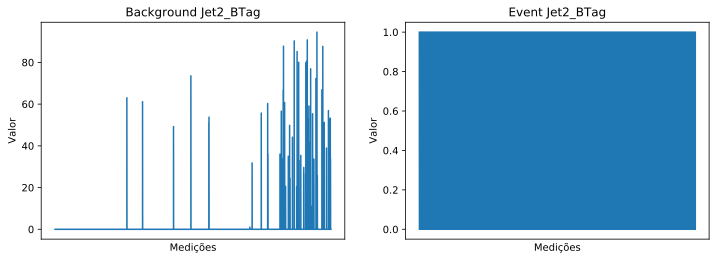

In [30]:
index = 10

# Dados
y1 = bkgd_np[:, index]
y2 = fcnc_np[:, index]
x = [i for i in range (0, min(len(y1), len(y2)))]
y1 = y1[0:min(len(y1), len(y2))]
y2 = y2[0:min(len(y1), len(y2))]

# Criar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title(f"Background {fcnc_df.columns.values[index]}")
ax1.plot(x, y1)
ax1.set_xticks([])
ax1.set_xlabel("Medições")
ax1.set_ylabel("Valor")

ax2.set_title(f"Event {fcnc_df.columns.values[index]}")
ax2.plot(x, y2)
ax2.set_xticks([])
ax2.set_xlabel("Medições")
ax2.set_ylabel("Valor")

plt.show()

# Estatísticas dos dados

In [31]:
# Estatísticas dos eventos
fcnc_df.describe()

,Jet_Multi,Jet1_Mass,Jet1_Eta,Jet1_Phi,Jet1_PT,Jet1_BTag,Jet2_Mass,Jet2_Eta,Jet2_Phi,Jet2_PT,...,Muon_Multi,Muon1_Eta,Muon1_Phi,Muon1_PT,Muon2_Eta,Muon2_Phi,Muon2_PT,MissingET_MET,MissingET_Phi,ScalarHT_HT
count,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,...,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000,744876.000000
mean,3.397549,20.108084,0.001318,-0.000252,167.149450,0.343226,11.044857,-0.001674,-0.003126,82.422980,...,1.007396,-0.000714,0.004396,87.887815,-0.000883,0.000313,22.050724,108.379823,-0.003696,536.457721
std,1.572450,21.711602,1.516512,1.807585,148.552644,0.474787,11.769874,1.649757,1.730214,79.575525,...,0.973444,1.021072,1.421656,132.422314,0.683306,1.012053,48.066495,98.317564,1.813905,367.765844
min,0.000000,-0.000106,-4.975230,-3.141593,0.000000,0.000000,-0.000086,-4.977282,-3.141592,0.000000,...,0.000000,-2.399990,-3.141585,0.000000,-2.399989,-3.141572,0.000000,0.051605,-3.141576,0.000000
25%,2.000000,8.745375,-1.076707,-1.559412,81.123398,0.000000,5.299087,-1.118462,-1.423850,39.221431,...,0.000000,-0.404076,-0.570233,0.000000,0.000000,0.000000,0.000000,47.290346,-1.571928,297.213135
50%,3.000000,13.799161,0.000000,0.000000,123.639839,0.000000,8.741450,0.000000,0.000000,63.622316,...,1.000000,0.000000,0.000000,40.592066,0.000000,0.000000,0.000000,81.122047,-0.008047,435.110092
75%,4.000000,22.786366,1.083350,1.559660,197.477093,1.000000,13.700957,1.111566,1.413704,102.426683,...,2.000000,0.400957,0.589375,122.761686,0.000000,0.000000,27.526875,136.145893,1.566404,659.837875
max,15.000000,480.407684,4.958564,3.141578,3392.895020,1.000000,797.078491,4.984097,3.141585,3096.436279,...,5.000000,2.399966,3.141582,2860.205566,2.399863,3.141525,1429.202881,2170.532471,3.141574,6930.255859


In [32]:
# Estatísticas do background
bkgd_df.describe()

,FatJet_Multi,FatJet1_PT,FatJet2_PT,FatJet3_PT,FatJet4_PT,FatJet5_PT,FatJet1_Mass,FatJet2_Mass,FatJet3_Mass,FatJet4_Mass,...,Electron_Multi,Electron1_PT,Electron2_PT,Electron1_Eta,Electron2_Eta,Electron1_Phi,Electron2_Phi,MissingET_MET,MissingET_Phi,ScalarHT_HT
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,...,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,0.264097,55.171121,20.863659,2.844489,0.290113,0.021425,13.252510,5.124585,0.645711,0.059376,...,0.561777,32.709561,4.873109,0.000590,-0.000108,0.000812,0.000981,70.166459,-0.001069,397.016206
std,0.622167,127.657215,81.015583,28.058953,8.650198,2.289556,33.538341,21.821871,7.121703,1.993549,...,0.692711,51.138094,17.612038,0.762430,0.360965,1.217275,0.587597,49.438045,1.813118,228.675725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000061,-0.000068,-0.000013,-0.000005,...,0.000000,0.000000,0.000000,-2.499956,-2.499738,-3.141570,-3.141444,0.007939,-3.141578,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.398041,-1.570881,245.524307
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.321531,-0.002167,340.327515
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,53.960952,0.000000,0.000000,0.000000,0.000000,0.000000,94.171255,1.568504,483.871307
max,6.000000,2114.479004,1787.803467,772.128235,636.880310,375.903107,585.782532,620.242981,305.244202,174.254364,...,5.000000,1451.913452,447.481750,2.499954,2.499536,3.141580,3.141414,1206.796875,3.141585,4557.136230


Os dados de background aparentam ser maioritariamente nulos com algumas flutuações. Estas flutuações possívelmente poderão dar origem a erros de classificação?

# Adicionar labels aos dados

As labels estão definidas de forma a que representem:
- 0: Background
- 1: Evento

In [34]:
bkgd_np = [[bkgd_np[i], 0] for i in range(len(bkgd_np))]
fcnc_np = [[fcnc_np[i], 1] for i in range(len(fcnc_np))]

# Criar datasets de treino e teste

In [35]:
test_pctg = 0.1

In [36]:
# Dividir cada classe em treino e teste
events_split = int(test_pctg * len(fcnc_np))
bkgd_split = int (test_pctg * len(bkgd_np))

fcnc = np.split(fcnc_np, [events_split, len(fcnc_np)])
bkgd = np.split(bkgd_np, [bkgd_split, len(bkgd_np)])

In [37]:
# Concatenar os dados de cada classe
test_data = np.concatenate([fcnc[0], bkgd[0]])
train_data = np.concatenate([fcnc[1], bkgd[1]])

In [39]:
print(test_data.shape, test_data[0][0], test_data[0][1])
print(train_data.shape, train_data[0][0], train_data[0][1])

(149487, 2) [2.0, 29.559593200683594, -0.04144889488816261, -0.8965510129928589, 605.8662719726562, 0.0, 10.27775764465332, 0.3242447078227997, 0.4889015853404999, 105.36397552490234, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 5.44502067565918, 6.324285984039307, 7.601474285125732, 10.754167556762695, 24.818368911743164, 604.9639892578125, 39.24374008178711, -0.04234231263399124, -0.8955001831054688, 546.8305053710938, 89.80655670166016, 1.0529671907424927, 2.615070104598999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0137814283370972, 2.7100136280059814, 402.2010803222656, 1.1198338270187378, 2.360116481781006, 150.9742431640625, 1.0, 1.681274652481079, 1.8947813510894775, 45.330360412597656, 0.0, 0.0, 0.0, 116.30099487304688, 1.2074253559112549, 1309.7359619140625] 1
(1345389, 2) [4.0, 12.432066917419434, 2.2550876140594482, 0.2832815945148468, 172.7097930908203, 1.0, 33.07562255859375, -0.9954534769058228, 2.835368394

In [40]:
# Desordenar os dados para os dados de cada classes estarem mais dispersos
np.random.shuffle(test_data)
np.random.shuffle(train_data)

In [ ]:
# Guardas os dados
np.save("Test_Data.npy", test_data)
np.save("Train_Data.npy", train_data)

# TODO: normalizar os dados !!!